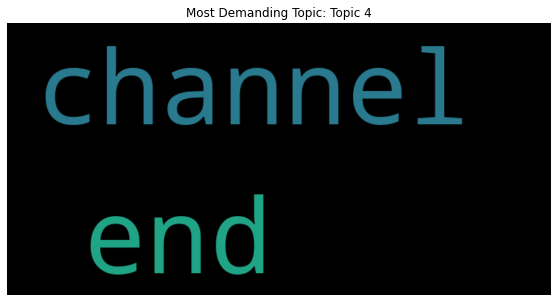

In [33]:
import pandas as pd
import re
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the comments from the CSV file
csv_file = '/Users/apple/Documents/Projects/Extract comments from youtube/video_comments.csv'
df = pd.read_csv(csv_file)

# Preprocess the comments
comments = df['Comment'].values.astype(str)

# Clean the comments
clean_comments = [re.sub(r'\n', ' ', comment.lower()) for comment in comments]
clean_comments = [re.sub(r'[^\w\s]', '', comment) for comment in clean_comments]

# Tokenize the comments
tokenized_comments = [comment.split() for comment in clean_comments]

# Create a dictionary from the tokenized comments
dictionary = corpora.Dictionary(tokenized_comments)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(comment) for comment in tokenized_comments]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Get the topic distribution for each comment
topic_distribution = [lda_model.get_document_topics(comment) for comment in corpus]

# Determine the most demanding topic
demanding_topic = max(topic_distribution, key=lambda x: max([prob for _, prob in x]))

# Get the topic number and probability
topic_number, _ = demanding_topic[0]

# Get the topic keywords
topic_keywords = [word for word, _ in lda_model.show_topic(topic_number)]

# Join the topic keywords into a single string
topic_keywords_string = ' '.join(topic_keywords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(topic_keywords_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Most Demanding Topic: Topic {topic_number}")
plt.show()
